In [1]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt
from scipy.fft import fft, rfftfreq, ifft, rfft, irfft
import pandas as pd

In [ ]:
b1 = signal.firwin(40, 0.5)
b2 = signal.firwin(41, [0.3, 0.8])
w1, h1 = signal.freqz(b1)
w2, h2 = signal.freqz(b2)

In [ ]:
plt.title('Digital filter frequency response')
plt.plot(w1, 20*np.log10(np.abs(h1)), 'b')
plt.plot(w2, 20*np.log10(np.abs(h2)), 'r')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


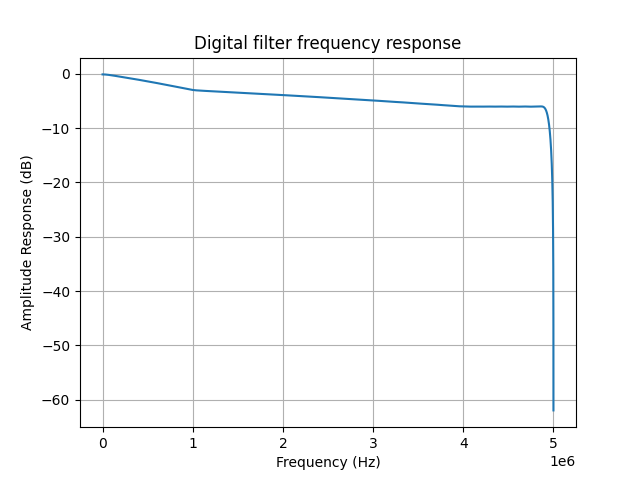

In [5]:
f=np.linspace(0,1,50000)
a = np.ones(50000)
#Switching power supply frequency (~290 KHz)
a[2850:2950] =0
 
#1.49 MHz
a[14850:14950]=0
    
#AM 1.37 MHz
a[13650:13750] = 0
    
#80 m Ham band (3.97 MHz)
a[39650:39750] = 0
   
#80 m Ham band (4 MHz)
a[39950:40050]= 0
    
a[-1]=0
    
b=signal.firwin2(3000,f,a)

b = signal.firwin2(150, [0.0, 0.3, 0.6, 1.0], [1.0, 2.0, 0.5, 0.0])

b = signal.firwin2(150,[0.0,1e6/5e6,4e6/5e6,(5e6-1)/5e6,5e6/5e6],[1.,1./np.sqrt(2),1./2,1./2,0.0])

[w, h] = signal.freqz(b,1, 50000,fs=10e6)

%matplotlib notebook
plt.title('Digital filter frequency response')
plt.plot(w, 20*np.log10(np.abs(h)))
#plt.plot(w, np.abs(h))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response (dB)')
#plt.xlabel('Frequency (rad/sample)')
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.show()

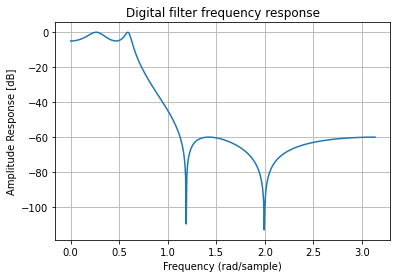

In [26]:
b, a = signal.iirfilter(4, Wn=0.2, rp=5, rs=60, btype='lowpass', ftype='ellip')
w, h = signal.freqz(b, a)

plt.title('Digital filter frequency response')
plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

In [ ]:
t = np.linspace(0, 2*np.pi, 1000, endpoint=True)
f = 3.0 # Frequency in Hz
A = 100.0 # Amplitude in Unit
s_sin = A * np.sin(2*np.pi*f*t) # Signal
plt.plot(t,s_sin)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.grid()
plt.show()

In [ ]:
Y_sin = fft(s_sin)
N_sin = int(len(Y_sin)/2+1)
plt.plot(20*np.log10(np.abs(Y_sin[:N_sin])))
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('Amplitude ($dB$)')
plt.grid()
plt.show()

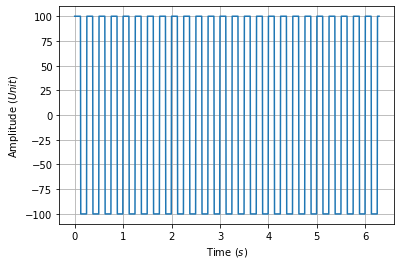

In [14]:
t = np.linspace(0, 2*np.pi, 1000, endpoint=True)
f = 4.0 # Frequency in Hz
A = 100.0 # Amplitude in Unit
s_sqr = A * signal.square(2*np.pi*f*t)
plt.plot(t,s_sqr)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.grid()
plt.show()

1000


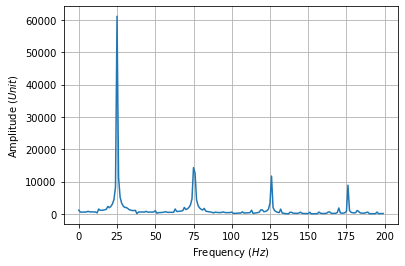

In [41]:
Y_sqr = fft(s_sqr)
N_sqr = int(len(Y_sqr)/2+1)
print(len(Y_sqr))
#plt.plot(np.abs(Y_sqr[:N_sqr]))
plt.plot( np.abs(Y_sqr[:200]))
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('Amplitude ($Unit$)')
plt.grid()
plt.show()

In [ ]:
inv_s_sqr = ifft(Y_sqr)
plt.plot(t,inv_s_sqr)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.grid()
plt.show()

1000


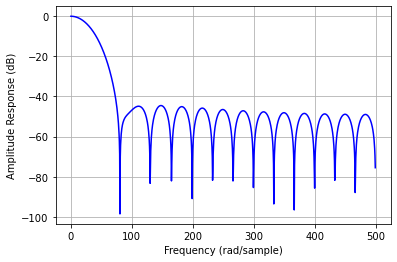

In [13]:
b_sqr = signal.firwin(30, 32.0/1000) # -3dB at 1 pi
w_sqr, h_sqr = signal.freqz(b_sqr,fs=1000,worN=1000)
print(len(w_sqr))
plt.plot(w_sqr, 20*np.log10(np.abs(h_sqr)), 'b')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

filt_sqr = np.multiply(Y_sqr,h_sqr)

/home/markg/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


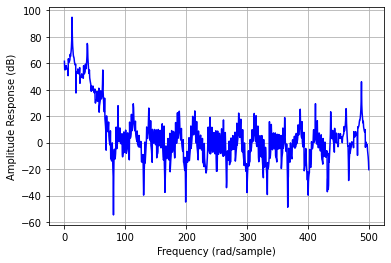

In [43]:
filt_sqr = np.multiply(Y_sqr,h_sqr)
plt.plot(w_sqr, 20*np.log10(np.abs(filt_sqr)), 'b')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.grid()
plt.show()

/home/markg/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


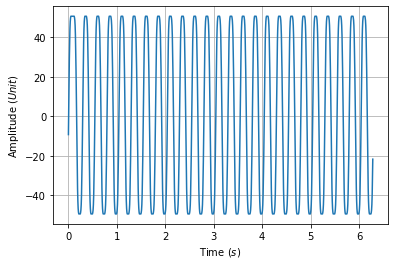

In [44]:
inv_filt_s_sqr = ifft(filt_sqr)
plt.plot(t,inv_filt_s_sqr)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.grid()
plt.show()

In [16]:
sig = np.repeat([0., 1., 0.,0,1,0], 50)
win = signal.windows.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

[0.00494458 0.0061714  0.00949254 0.01489207 0.02215704 0.03088791
 0.04052777 0.05040795 0.05980583 0.06800932 0.07438166 0.07842024
 0.07980334 0.07842024 0.07438166 0.06800932 0.05980583 0.05040795
 0.04052777 0.03088791 0.02215704 0.01489207 0.00949254 0.0061714
 0.00494458]


C:\Users\markgott\AppData\Local\Temp/ipykernel_21152/3719286555.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


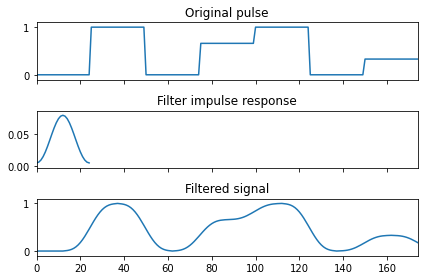

In [13]:
sig = np.repeat([0., 1., 0.,0.66,1,0,0.33], 25)
win = signal.windows.hann(50)
b_sqr = signal.firwin(25, 32.0/1000) # -3dB at 1 pi
print(b_sqr)
win =b_sqr
filtered = signal.convolve(sig, win, mode='same') / sum(win)
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

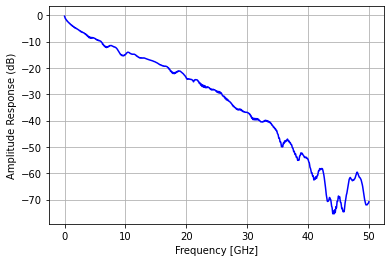

500000000000.0
[0.000e+00 2.000e-12 4.000e-12 ... 4.996e-09 4.998e-09 5.000e-09]
2501


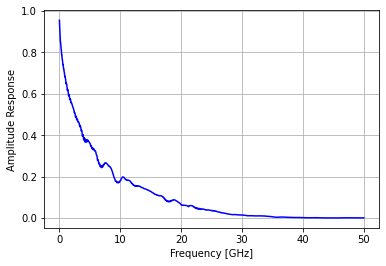

2501


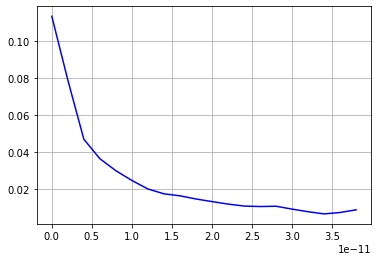

C:\Users\markgott\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


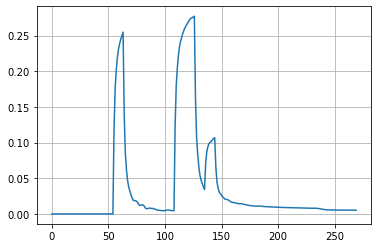

C:\Users\markgott\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


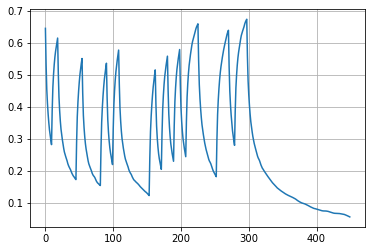

C:\Users\markgott\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


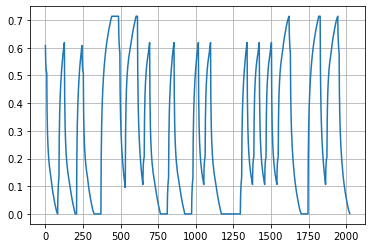

In [125]:
df = pd.DataFrame()
df = pd.read_csv('DB4.csv',usecols= ['GHz','dB'])
plt.plot( df.GHz, df.dB, 'b')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency [GHz]')
plt.grid()
plt.show()

#print(df.dB.tolist())

mag = [10**(x/20) for x in df.dB.tolist()]

Fs = df.tail(1).GHz.tolist()[0]*10e9
print(Fs)
n= len(df)
t = np.arange(0, n/Fs, 1/Fs)
print(t)
print(len(t))


#df = pd.read_csv('DB4.csv',usecols= ['GHz','dB'])
plt.plot( df.GHz, mag, 'b')
plt.ylabel('Amplitude Response')
plt.xlabel('Frequency [GHz]')
plt.grid()
plt.show()

t_pulse = np.fft.ifft(mag )
print(len(t_pulse))

plt.plot(t[:20],np.abs(t_pulse[:20]),'b')
#plt.plot(np.abs(t_pulse[:50]),'b')
plt.grid()
plt.show()
#t_pulse = ifft(df.loc['dB'])

sig = np.repeat([0,0,0,0,0,0,0,0,0,0,0,0,0.,0,0,0,1, 0.,0,0,0,0,1,1,0,0.33,0,0,0,0], 9)
filtered = signal.convolve(sig, t_pulse[:9*20], mode='same') / sum(t_pulse)
plt.plot(filtered)
plt.grid()
plt.show()

num = 643132987364918
sig2 = [int(x) for x in list(bin(num)[2:])]
sig2 = np.array(sig2)
sig2 = np.repeat(sig2,9)
#print(sig2)

filtered2 = signal.convolve(sig2, np.abs(t_pulse[:9*32]), mode='same') / sum(t_pulse)
plt.plot(filtered2)
plt.grid()
plt.show()

sig4 = sig2.reshape(-1,2)
sig4 = [int("".join(str(x) for x in y), 2) for y in sig4]
sig4 = [(1.0 if x==3 else (0.67 if x==2 else (0.33 if x==1 else 0))) for x in sig4]
#print(sig4)
sig4 = np.repeat(sig4,9)
filtered4 = signal.convolve(sig4, np.abs(t_pulse[:9*8]), mode='same') / sum(t_pulse)
plt.plot(filtered4)
plt.grid()
plt.show()